In [1]:
import numpy as np
import pandas as pd
from pandas.plotting import autocorrelation_plot, lag_plot
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

city_in_UTAH_weatherDF = pd.read_csv('./CRNH0203-2014-UT_Brigham_City_28_WNW.txt', delimiter=r"\s+", header=None)

In [2]:
SOIL_MOISTURE_5=pd.DataFrame(city_in_UTAH_weatherDF.iloc[4692:6168,28])
rain=pd.DataFrame(city_in_UTAH_weatherDF.iloc[4692:6168,12])
Temper=pd.DataFrame(city_in_UTAH_weatherDF.iloc[4692:6168,9])
RH=pd.DataFrame(city_in_UTAH_weatherDF.iloc[4692:6168,26])

DF1 = pd.concat([SOIL_MOISTURE_5, rain, Temper, RH], axis=1, sort=False)
DF1.columns = ['SoilMoisture', 'Precipitation','Temperature','Humidity']
DF=DF1.reset_index(drop=True)

In [3]:
from datetime import date, time, datetime, timedelta
time_step = timedelta(hours=1)
start_collection = datetime(2014, 7, 14, 3, 0, 0)
timestamp = [start_collection + time_step * i for i in DF.index]
DF.index = timestamp

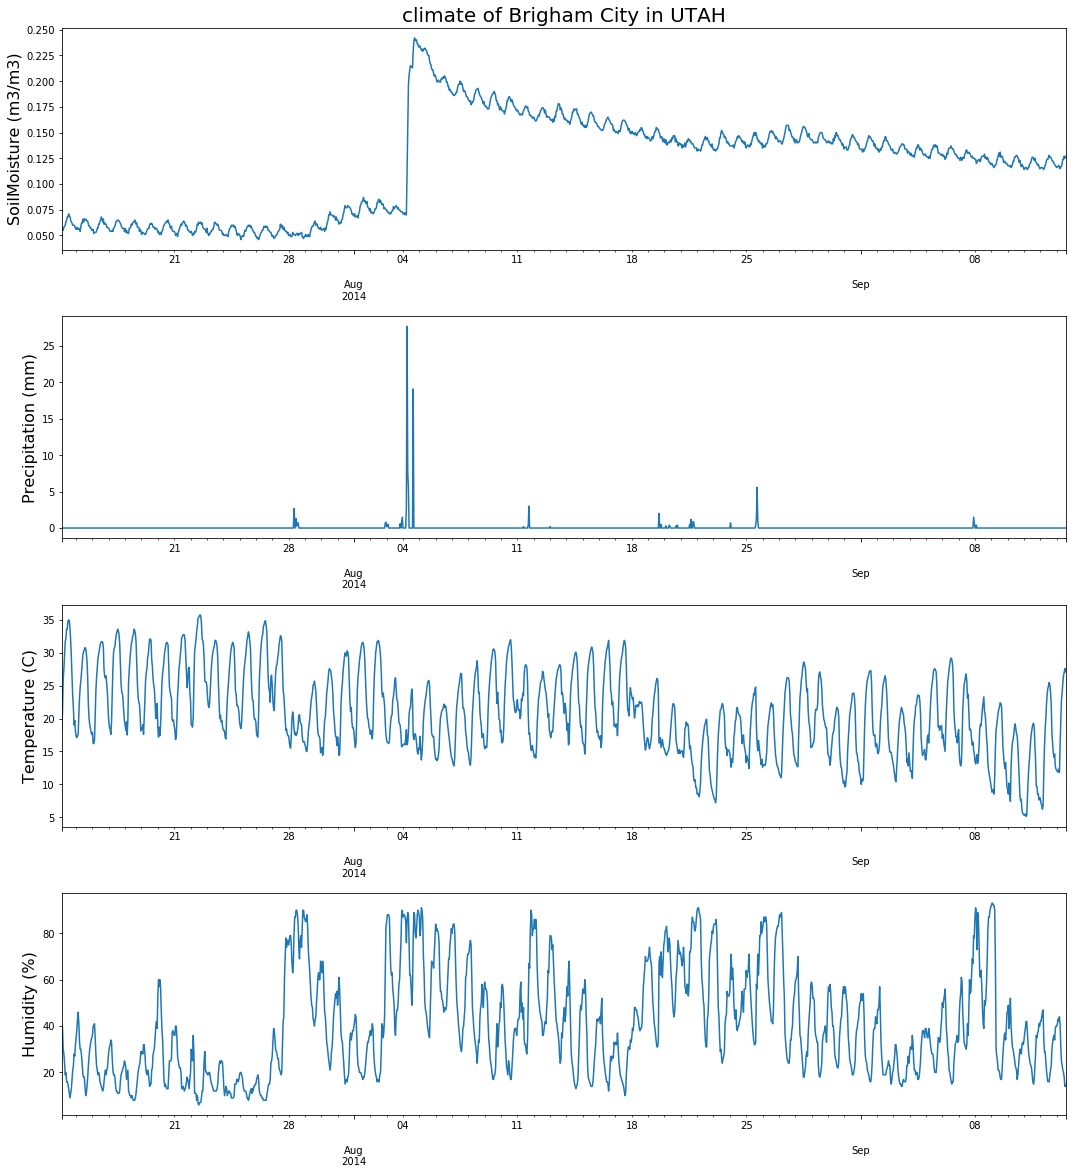

In [4]:
fig, axarr = plt.subplots(4, 1)
DF['SoilMoisture'].plot.line(figsize=(18, 20),ax=axarr[0])
DF['Precipitation'].plot.line(figsize=(18, 20),ax=axarr[1])
DF['Temperature'].plot.line(figsize=(18, 20),ax=axarr[2])
DF['Humidity'].plot.line(figsize=(18, 20),ax=axarr[3])

axarr[0].set_title('climate of Brigham City in UTAH', fontsize=20);
axarr[0].set_ylabel('SoilMoisture (m3/m3)', fontsize=16);
axarr[1].set_ylabel('Precipitation (mm)', fontsize=16);
axarr[2].set_ylabel('Temperature (C)', fontsize=16);
axarr[3].set_ylabel('Humidity (%)', fontsize=16);
plt.subplots_adjust(hspace=.3)

In [5]:
original_signal_temperature=DF['Temperature']
original_signal_Humidity=DF['Humidity']
original_signal_SoilMoisture=DF['SoilMoisture']
original_signal_Precipitation=DF['Precipitation']

# Auto-Correlation of Temperature signal

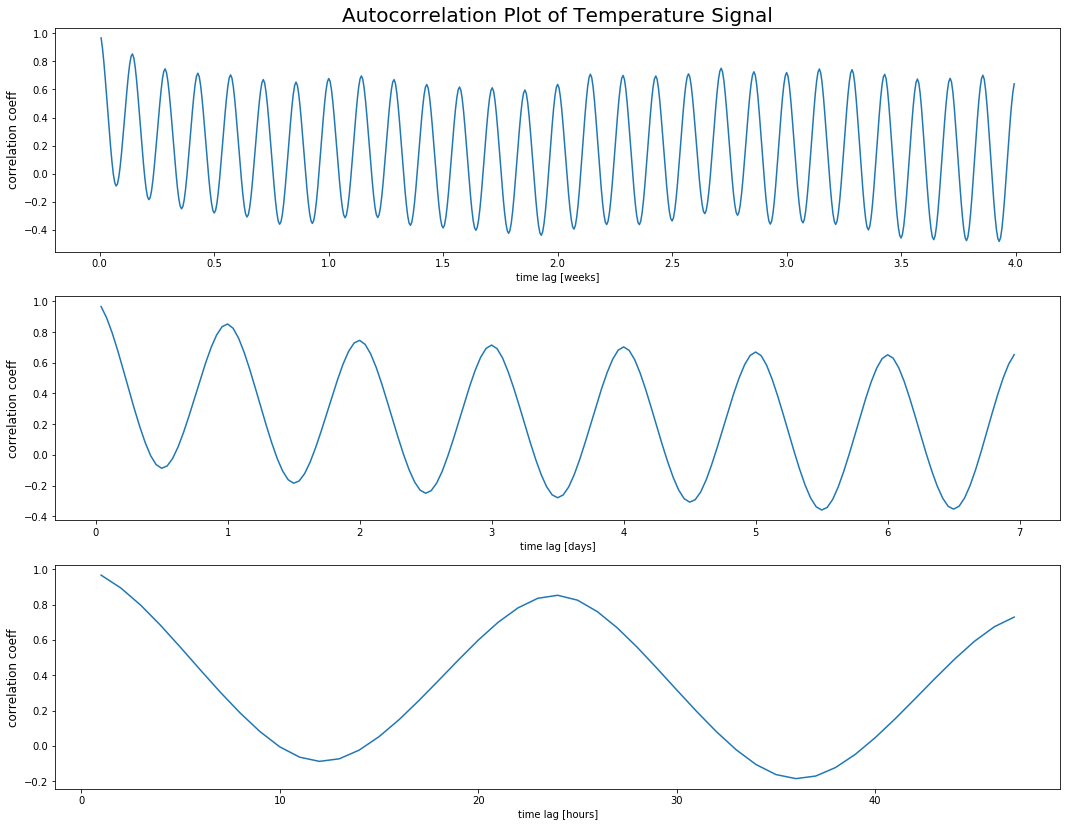

In [6]:
fig, ax = plt.subplots(nrows=3,ncols=1,figsize=(18,14))


ax[0].set_title('Autocorrelation Plot of Temperature Signal', fontsize=20);
ax[0].set_xlabel('time lag [months]'); ax[0].set_ylabel('correlation coeff', fontsize=12);

timeLags = np.arange(1,24*7*4)
autoCorr = [original_signal_temperature.autocorr(lag=dt) for dt in timeLags]
ax[0].plot(1.0/(24*7)*timeLags, autoCorr);
ax[0].set_xlabel('time lag [weeks]'); ax[0].set_ylabel('correlation coeff', fontsize=12);

timeLags = np.arange(1,7*24)
autoCorr = [original_signal_temperature.autocorr(lag=dt) for dt in timeLags]
ax[1].plot(1.0/24*timeLags, autoCorr);
ax[1].set_xlabel('time lag [days]'); ax[1].set_ylabel('correlation coeff', fontsize=12);

timeLags = np.arange(1,48)
autoCorr = [original_signal_temperature.autocorr(lag=dt) for dt in timeLags]
ax[2].plot(timeLags, autoCorr);
ax[2].set_xlabel('time lag [hours]'); ax[2].set_ylabel('correlation coeff', fontsize=12);

It can be seen that there is only one major considerable frequency that is for the period of about 24 hr.

In order to identify the exact period of the signals, we use auto-correlation function of the signals in the next section.

# Auto-Correlation function of Temperature Signal

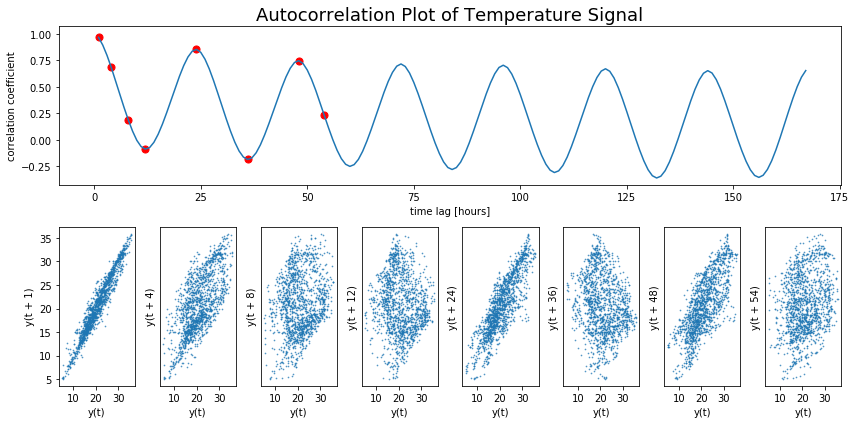

In [7]:
selectedLagPoints = [1,4,8,12,24,36,48,54]
maxLagDays = 7


# set grid spec of the subplots
plt.figure(figsize=(12,6))
gs = gridspec.GridSpec(2, len(selectedLagPoints))
axTopRow = plt.subplot(gs[0, :])
axBottomRow = []
for i in range(len(selectedLagPoints)):
    axBottomRow.append(plt.subplot(gs[1, i]))

# plot autocorr
allTimeLags = np.arange(1,maxLagDays*24)
autoCorr = [original_signal_temperature.autocorr(lag=dt) for dt in allTimeLags]
axTopRow.plot(allTimeLags,autoCorr); 
axTopRow.set_title('Autocorrelation Plot of Temperature Signal', fontsize=18);
axTopRow.set_xlabel('time lag [hours]'); axTopRow.set_ylabel('correlation coefficient')
selectedAutoCorr = [original_signal_temperature.autocorr(lag=dt) for dt in selectedLagPoints]
axTopRow.scatter(x=selectedLagPoints, y=selectedAutoCorr, s=50, c='r')

# plot scatter plot of selected points
for i in range(len(selectedLagPoints)):
    lag_plot(original_signal_temperature, lag=selectedLagPoints[i], s=0.5, alpha=0.7, ax=axBottomRow[i])    
    if i >= 1:
        axBottomRow[i].set_yticks([],[])
plt.tight_layout()

It is observerd in the figures that the exact period is 24 hr because the distribution graph of $y(t+1)$ has the most similarity with the distribution at $y(t+24)$

# Auto-Correlation function of Humidity Signal

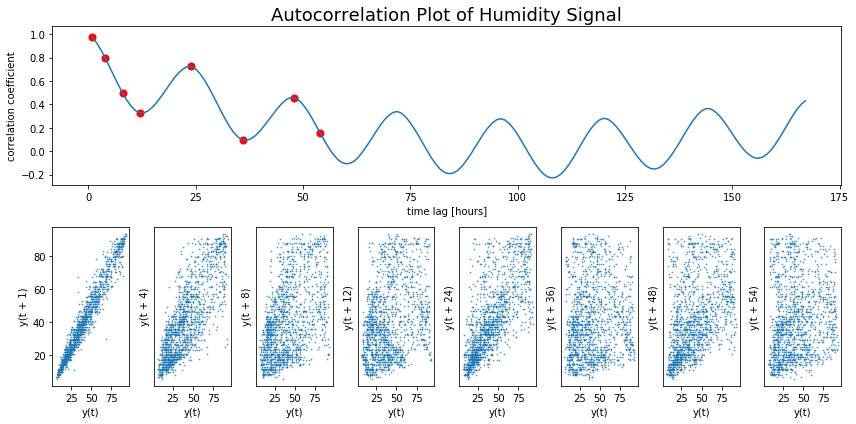

In [8]:
selectedLagPoints = [1,4,8,12,24,36,48,54]
maxLagDays = 7



# set grid spec of the subplots
plt.figure(figsize=(12,6))
gs = gridspec.GridSpec(2, len(selectedLagPoints))
axTopRow = plt.subplot(gs[0, :])
axBottomRow = []
for i in range(len(selectedLagPoints)):
    axBottomRow.append(plt.subplot(gs[1, i]))

# plot autocorr
allTimeLags = np.arange(1,maxLagDays*24)
autoCorr = [original_signal_Humidity.autocorr(lag=dt) for dt in allTimeLags]
axTopRow.plot(allTimeLags,autoCorr); 
axTopRow.set_title('Autocorrelation Plot of Humidity Signal', fontsize=18);
axTopRow.set_xlabel('time lag [hours]'); axTopRow.set_ylabel('correlation coefficient')
selectedAutoCorr = [original_signal_Humidity.autocorr(lag=dt) for dt in selectedLagPoints]
axTopRow.scatter(x=selectedLagPoints, y=selectedAutoCorr, s=50, c='r')

# plot scatter plot of selected points
for i in range(len(selectedLagPoints)):
    lag_plot(original_signal_Humidity, lag=selectedLagPoints[i], s=0.5, alpha=0.7, ax=axBottomRow[i])    
    if i >= 1:
        axBottomRow[i].set_yticks([],[])
plt.tight_layout()

# Auto-Correlation function of Soil Moisture Signal

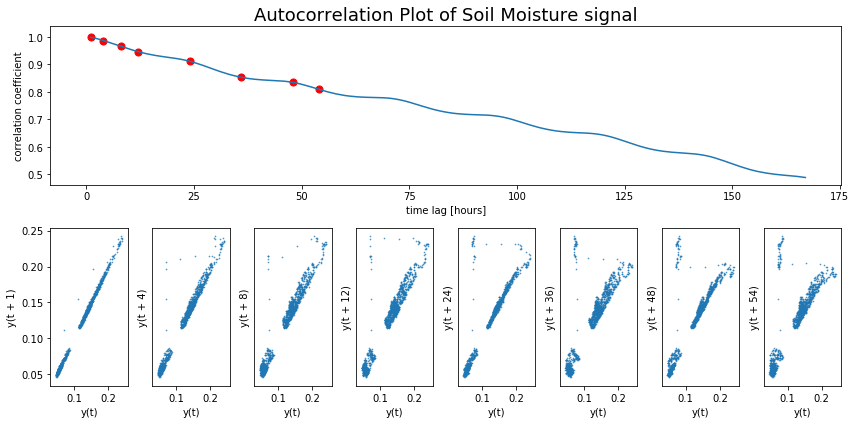

In [9]:
selectedLagPoints = [1,4,8,12,24,36,48,54]
maxLagDays = 7



# set grid spec of the subplots
plt.figure(figsize=(12,6))
gs = gridspec.GridSpec(2, len(selectedLagPoints))
axTopRow = plt.subplot(gs[0, :])
axBottomRow = []
for i in range(len(selectedLagPoints)):
    axBottomRow.append(plt.subplot(gs[1, i]))

# plot autocorr
allTimeLags = np.arange(1,maxLagDays*24)
autoCorr = [original_signal_SoilMoisture.autocorr(lag=dt) for dt in allTimeLags]
axTopRow.plot(allTimeLags,autoCorr); 
axTopRow.set_title('Autocorrelation Plot of Soil Moisture signal', fontsize=18);
axTopRow.set_xlabel('time lag [hours]'); axTopRow.set_ylabel('correlation coefficient')
selectedAutoCorr = [original_signal_SoilMoisture.autocorr(lag=dt) for dt in selectedLagPoints]
axTopRow.scatter(x=selectedLagPoints, y=selectedAutoCorr, s=50, c='r')

# plot scatter plot of selected points
for i in range(len(selectedLagPoints)):
    lag_plot(original_signal_SoilMoisture, lag=selectedLagPoints[i], s=0.5, alpha=0.7, ax=axBottomRow[i])    
    if i >= 1:
        axBottomRow[i].set_yticks([],[])
plt.tight_layout()

# Moving average and Low Pass Filtered Signal

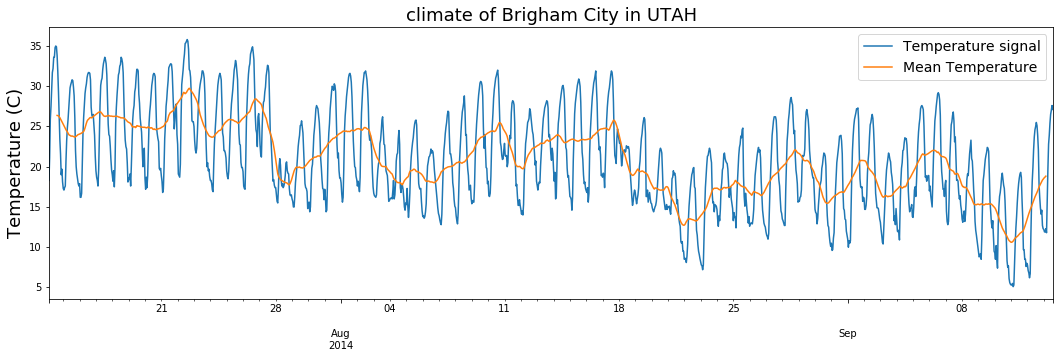

In [10]:
windowSize = 24
temp_lowPassFilteredSignal = original_signal_temperature.rolling(windowSize, center=True).mean()

original_signal_temperature.plot.line(figsize=(18, 5), label='Temperature signal')
temp_lowPassFilteredSignal.plot.line(figsize=(18, 5), label='Mean Temperature')
plt.legend(loc='upper right',fontsize=14 )
plt.title("climate of Brigham City in UTAH", fontsize=18);
plt.ylabel("Temperature (C)", fontsize=18);

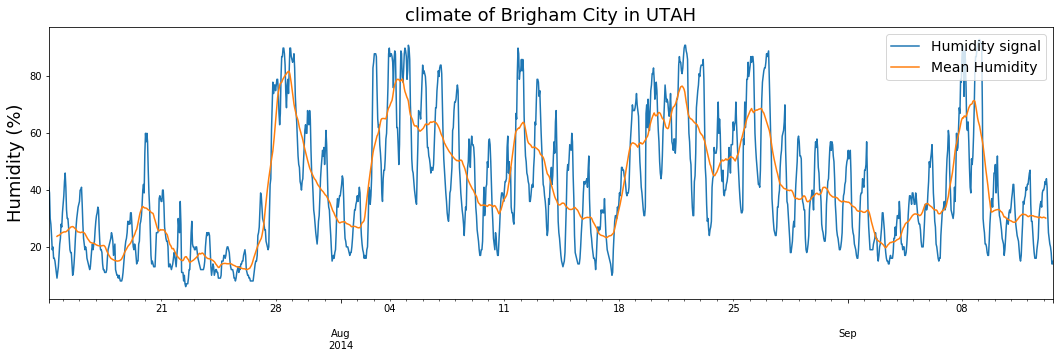

In [11]:
windowSize = 24
Humidity_lowPassFilteredSignal = original_signal_Humidity.rolling(windowSize, center=True).mean()

original_signal_Humidity.plot.line(figsize=(18, 5), label='Humidity signal')
Humidity_lowPassFilteredSignal.plot.line(figsize=(18, 5), label='Mean Humidity')
plt.legend(loc='upper right',fontsize=14 )
plt.title("climate of Brigham City in UTAH", fontsize=18);
plt.ylabel("Humidity (%)", fontsize=18);

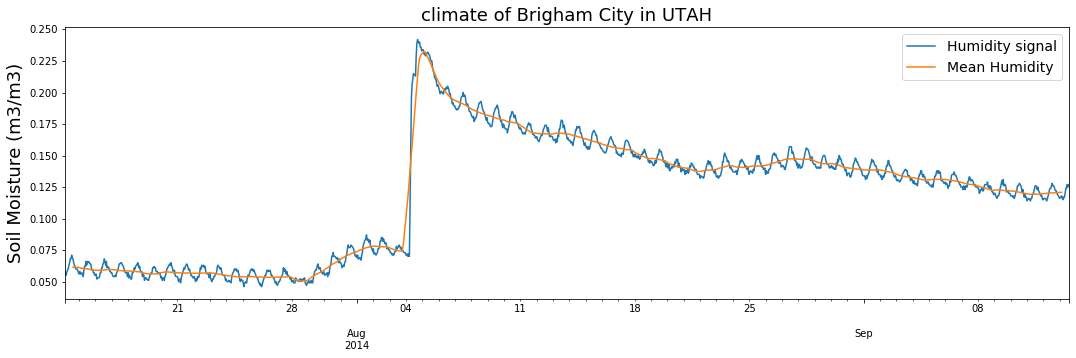

In [12]:
windowSize = 24
SoilMoisture_lowPassFilteredSignal = original_signal_SoilMoisture.rolling(windowSize, center=True).mean()

original_signal_SoilMoisture.plot.line(figsize=(18, 5), label='Humidity signal')
SoilMoisture_lowPassFilteredSignal.plot.line(figsize=(18, 5), label='Mean Humidity')
plt.legend(loc='upper right',fontsize=14 )
plt.title("climate of Brigham City in UTAH", fontsize=18);
plt.ylabel("Soil Moisture (m3/m3)", fontsize=18);

# High Pass Filtered Signal

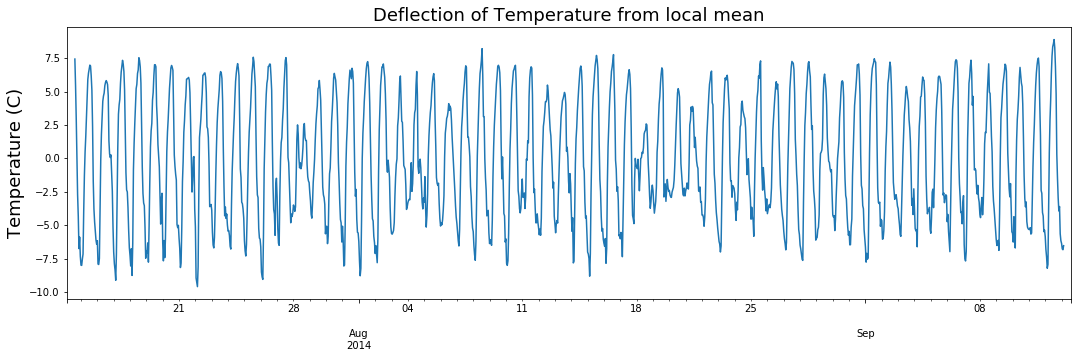

In [13]:
temp_highPassFilteredSignal = original_signal_temperature - temp_lowPassFilteredSignal
temp_highPassFilteredSignal.plot.line(figsize=(18, 5))
plt.ylabel("Temperature (C)", fontsize=18);
plt.title("Deflection of Temperature from local mean", fontsize=18);

As it can be seen from the above figure, the amplitude of the temperature signal is about (2*7)=14 C

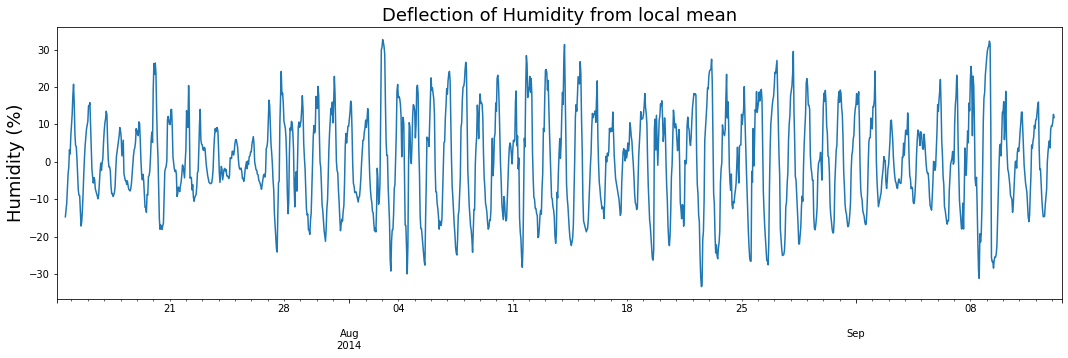

In [14]:
Humidity_highPassFilteredSignal = original_signal_Humidity - Humidity_lowPassFilteredSignal
Humidity_highPassFilteredSignal.plot.line(figsize=(18, 5))
plt.ylabel("Humidity (%)", fontsize=18);
plt.title("Deflection of Humidity from local mean", fontsize=18);

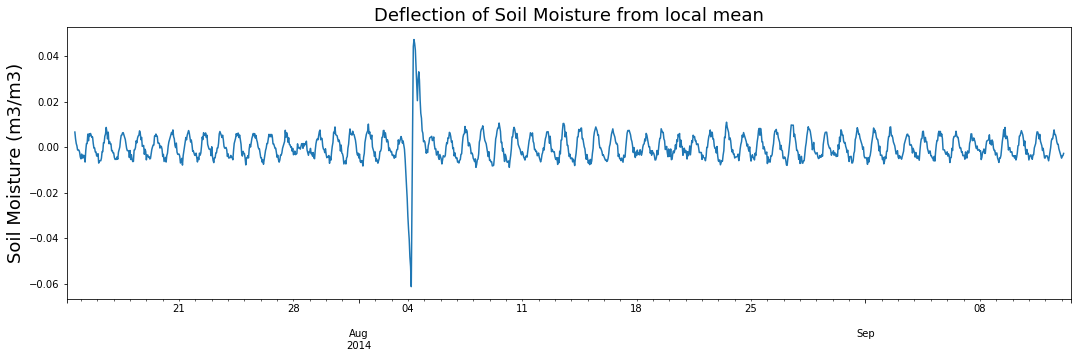

In [15]:
SoilMoisture_highPassFilteredSignal = original_signal_SoilMoisture - SoilMoisture_lowPassFilteredSignal

SoilMoisture_highPassFilteredSignal.plot.line(figsize=(18, 5))
plt.ylabel("Soil Moisture (m3/m3)", fontsize=18);
plt.title("Deflection of Soil Moisture from local mean", fontsize=18);

Also, the above figure shows that the amplitude of the humidity signal is about (2*25%)=50%

# Auto-Correlation of the Low Pass Filtered Temperature Signal

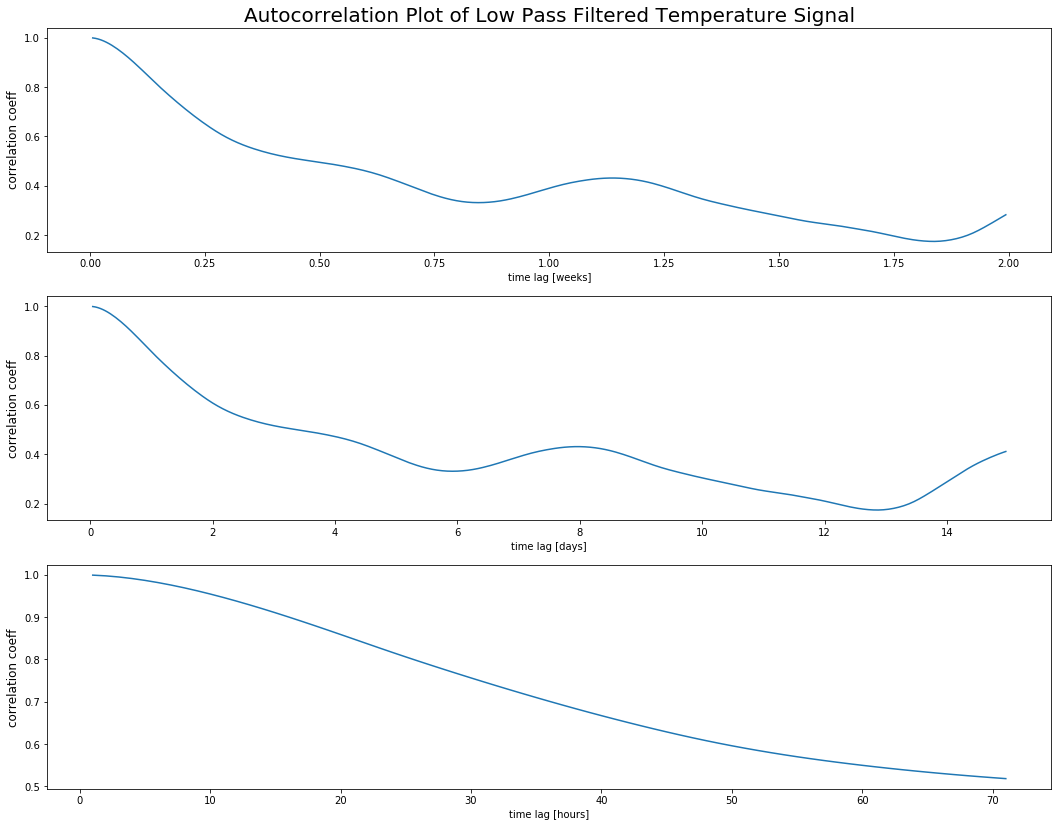

In [16]:
#%% autocorr of low pass filtered singal
fig, ax = plt.subplots(nrows=3,ncols=1,figsize=(18,14))


ax[0].set_title('Autocorrelation Plot of Low Pass Filtered Temperature Signal', fontsize=20);
ax[0].set_xlabel('time lag [months]'); ax[0].set_ylabel('correlation coeff', fontsize=12);

timeLags = np.arange(1,2*24*7)
autoCorr = [temp_lowPassFilteredSignal.autocorr(lag=dt) for dt in timeLags]
ax[0].plot(1.0/(24*7)*timeLags, autoCorr);
ax[0].set_xlabel('time lag [weeks]'); ax[0].set_ylabel('correlation coeff', fontsize=12);

timeLags = np.arange(1,15*24)
autoCorr = [temp_lowPassFilteredSignal.autocorr(lag=dt) for dt in timeLags]
ax[1].plot(1.0/24*timeLags, autoCorr);
ax[1].set_xlabel('time lag [days]'); ax[1].set_ylabel('correlation coeff', fontsize=12);

timeLags = np.arange(1,3*24)
autoCorr = [temp_lowPassFilteredSignal.autocorr(lag=dt) for dt in timeLags]
ax[2].plot(timeLags, autoCorr);
ax[2].set_xlabel('time lag [hours]'); ax[2].set_ylabel('correlation coeff', fontsize=12);

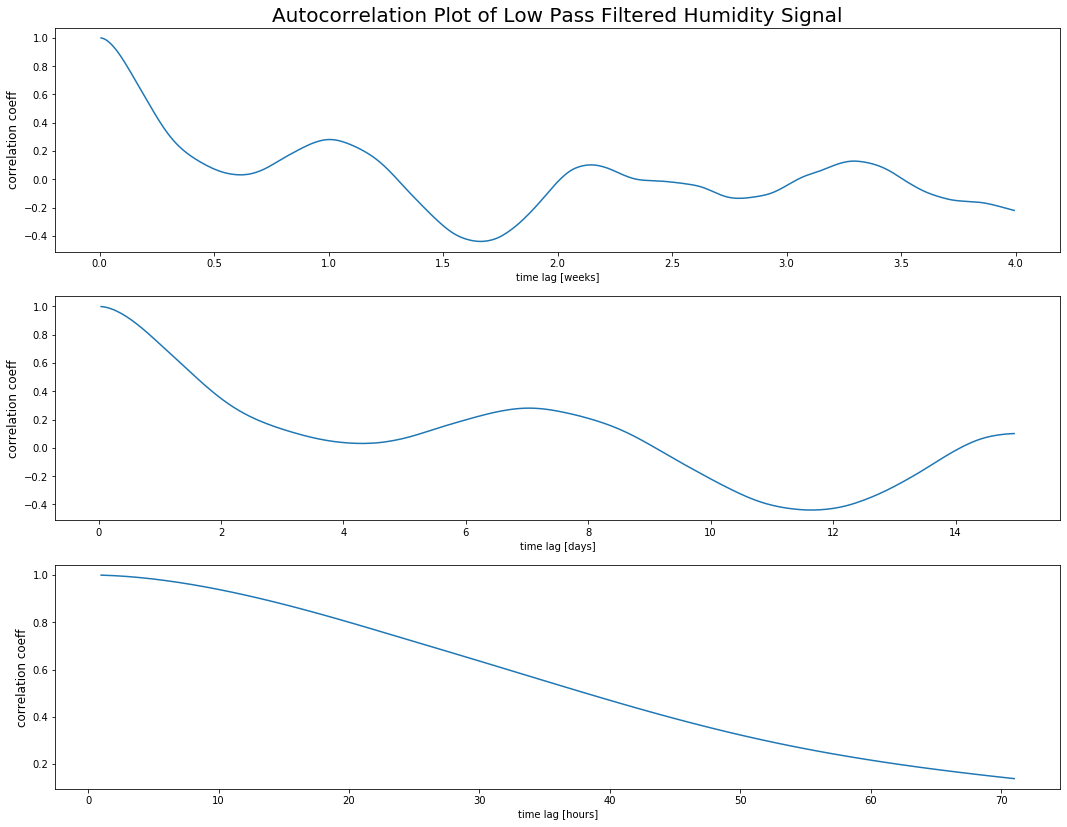

In [17]:
#%% autocorr of low pass filtered singal
fig, ax = plt.subplots(nrows=3,ncols=1,figsize=(18,14))


ax[0].set_title('Autocorrelation Plot of Low Pass Filtered Humidity Signal', fontsize=20);
ax[0].set_xlabel('time lag [months]'); ax[0].set_ylabel('correlation coeff', fontsize=12);

timeLags = np.arange(1,4*24*7)
autoCorr = [Humidity_lowPassFilteredSignal.autocorr(lag=dt) for dt in timeLags]
ax[0].plot(1.0/(24*7)*timeLags, autoCorr);
ax[0].set_xlabel('time lag [weeks]'); ax[0].set_ylabel('correlation coeff', fontsize=12);

timeLags = np.arange(1,15*24)
autoCorr = [Humidity_lowPassFilteredSignal.autocorr(lag=dt) for dt in timeLags]
ax[1].plot(1.0/24*timeLags, autoCorr);
ax[1].set_xlabel('time lag [days]'); ax[1].set_ylabel('correlation coeff', fontsize=12);

timeLags = np.arange(1,3*24)
autoCorr = [Humidity_lowPassFilteredSignal.autocorr(lag=dt) for dt in timeLags]
ax[2].plot(timeLags, autoCorr);
ax[2].set_xlabel('time lag [hours]'); ax[2].set_ylabel('correlation coeff', fontsize=12);

# Auto-Correlation of the High Pass Filtered Signal

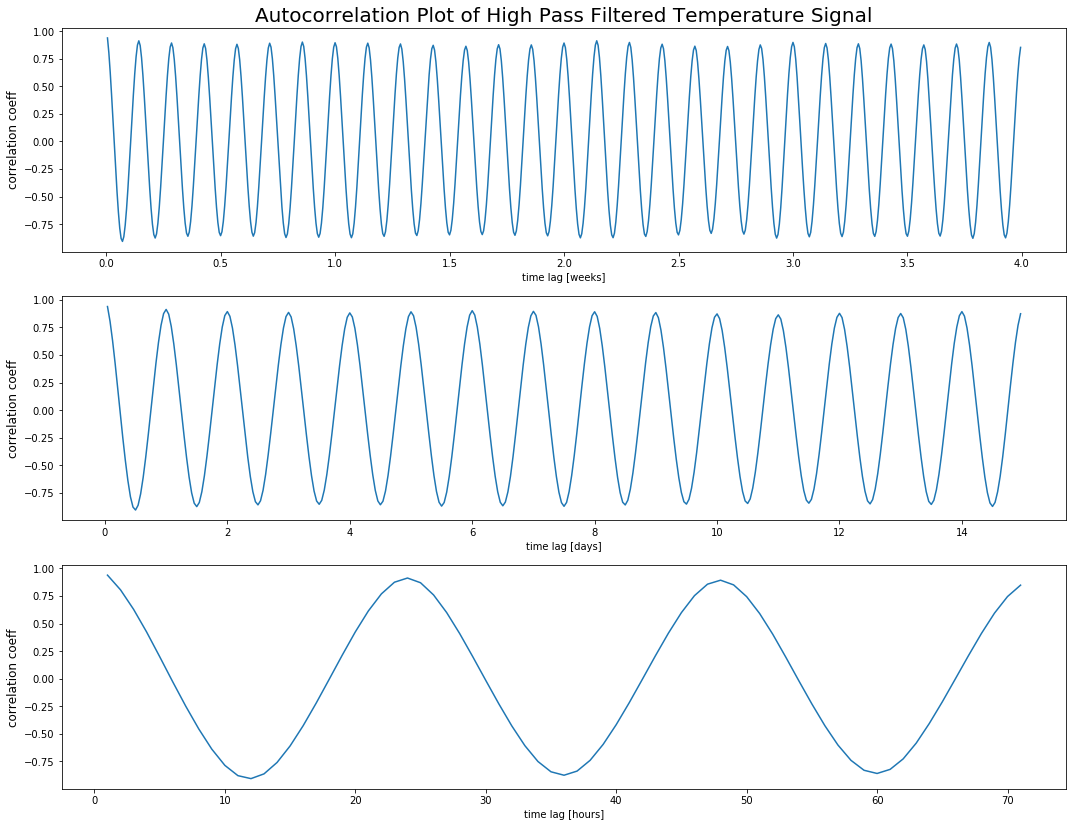

In [18]:
#%% autocorr of high pass filtered Temperature singal
fig, ax = plt.subplots(nrows=3,ncols=1,figsize=(18,14))


ax[0].set_title('Autocorrelation Plot of High Pass Filtered Temperature Signal', fontsize=20);
ax[0].set_xlabel('time lag [months]'); ax[0].set_ylabel('correlation coeff', fontsize=12);

timeLags = np.arange(1,4*24*7)
autoCorr = [temp_highPassFilteredSignal.autocorr(lag=dt) for dt in timeLags]
ax[0].plot(1.0/(24*7)*timeLags, autoCorr);
ax[0].set_xlabel('time lag [weeks]'); ax[0].set_ylabel('correlation coeff', fontsize=12);

timeLags = np.arange(1,15*24)
autoCorr = [temp_highPassFilteredSignal.autocorr(lag=dt) for dt in timeLags]
ax[1].plot(1.0/24*timeLags, autoCorr);
ax[1].set_xlabel('time lag [days]'); ax[1].set_ylabel('correlation coeff', fontsize=12);

timeLags = np.arange(1,3*24)
autoCorr = [temp_highPassFilteredSignal.autocorr(lag=dt) for dt in timeLags]
ax[2].plot(timeLags, autoCorr);
ax[2].set_xlabel('time lag [hours]'); ax[2].set_ylabel('correlation coeff', fontsize=12);

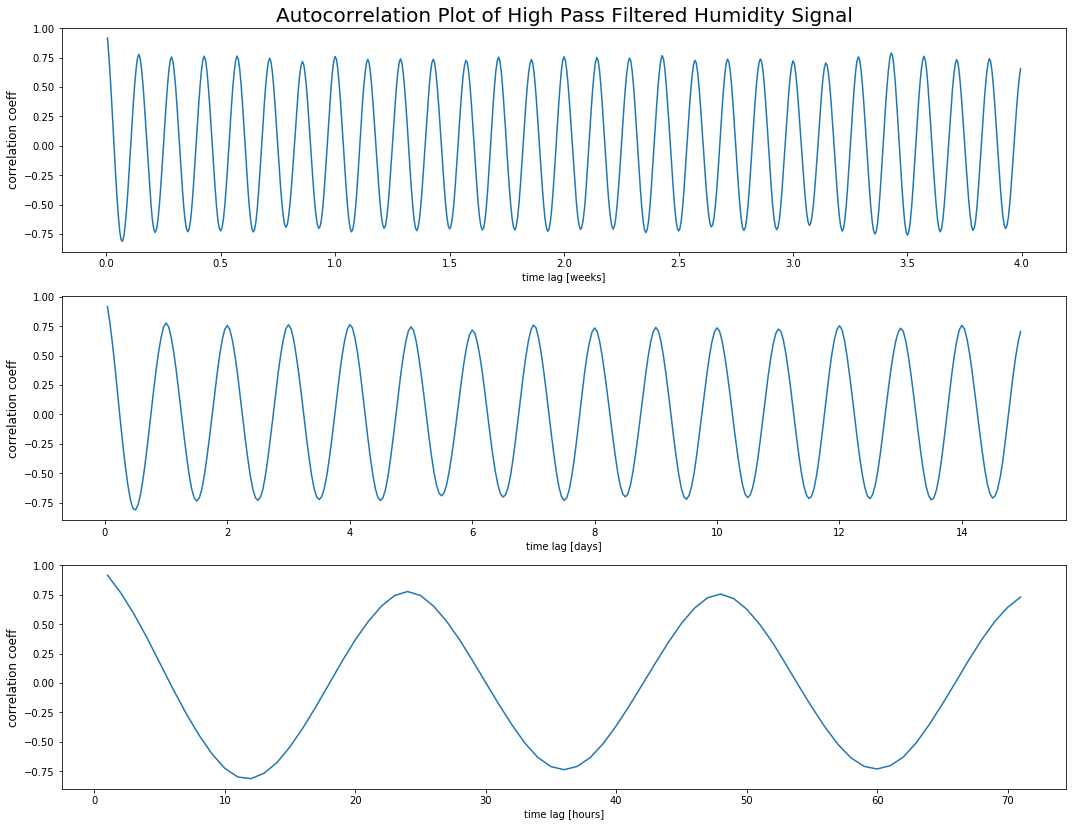

In [20]:
#%% autocorr of high pass filtered Humidity singal
fig, ax = plt.subplots(nrows=3,ncols=1,figsize=(18,14))

timeLags = np.arange(1,25*24*30)
autoCorr = [Humidity_highPassFilteredSignal.autocorr(lag=dt) for dt in timeLags]

ax[0].set_title('Autocorrelation Plot of High Pass Filtered Humidity Signal', fontsize=20);
ax[0].set_xlabel('time lag [months]'); ax[0].set_ylabel('correlation coeff', fontsize=12);

timeLags = np.arange(1,4*24*7)
autoCorr = [Humidity_highPassFilteredSignal.autocorr(lag=dt) for dt in timeLags]
ax[0].plot(1.0/(24*7)*timeLags, autoCorr);
ax[0].set_xlabel('time lag [weeks]'); ax[0].set_ylabel('correlation coeff', fontsize=12);

timeLags = np.arange(1,15*24)
autoCorr = [Humidity_highPassFilteredSignal.autocorr(lag=dt) for dt in timeLags]
ax[1].plot(1.0/24*timeLags, autoCorr);
ax[1].set_xlabel('time lag [days]'); ax[1].set_ylabel('correlation coeff', fontsize=12);

timeLags = np.arange(1,3*24)
autoCorr = [Humidity_highPassFilteredSignal.autocorr(lag=dt) for dt in timeLags]
ax[2].plot(timeLags, autoCorr);
ax[2].set_xlabel('time lag [hours]'); ax[2].set_ylabel('correlation coeff', fontsize=12);

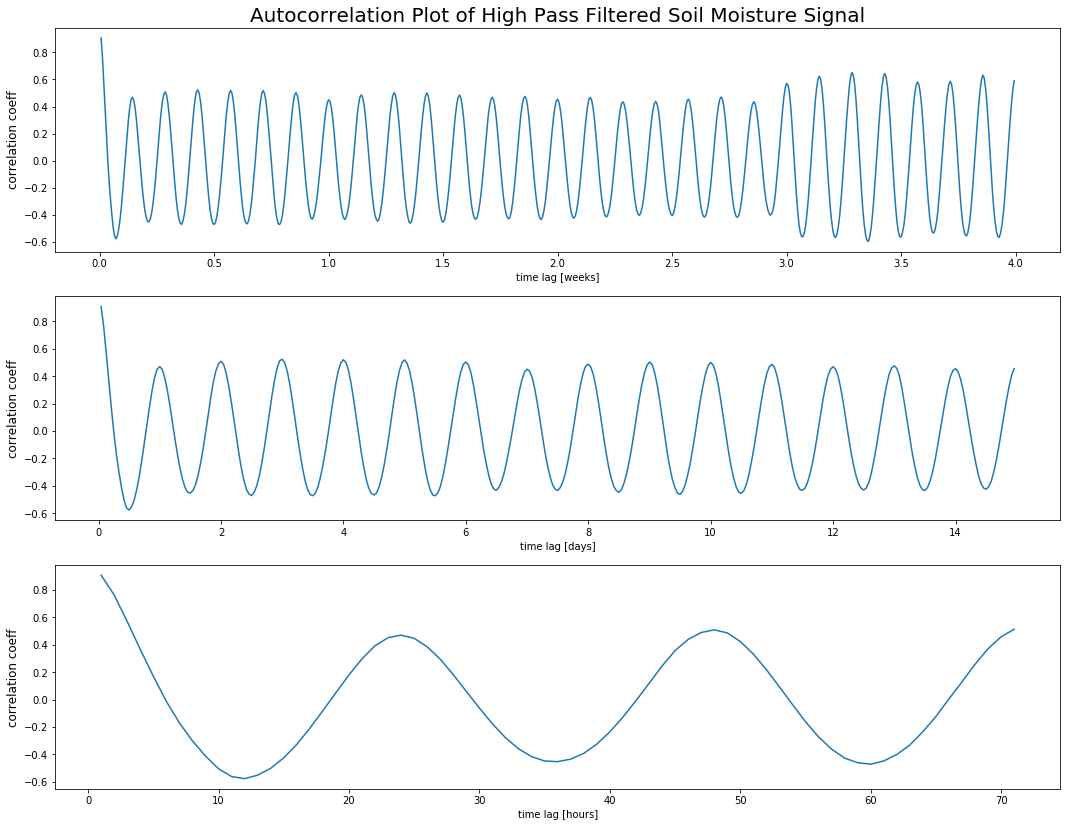

In [22]:
#%% autocorr of high pass filtered soil moisture singal
fig, ax = plt.subplots(nrows=3,ncols=1,figsize=(18,14))

timeLags = np.arange(1,25*24*30)
autoCorr = [SoilMoisture_highPassFilteredSignal.autocorr(lag=dt) for dt in timeLags]

ax[0].set_title('Autocorrelation Plot of High Pass Filtered Soil Moisture Signal', fontsize=20);
ax[0].set_xlabel('time lag [months]'); ax[0].set_ylabel('correlation coeff', fontsize=12);

timeLags = np.arange(1,4*24*7)
autoCorr = [SoilMoisture_highPassFilteredSignal.autocorr(lag=dt) for dt in timeLags]
ax[0].plot(1.0/(24*7)*timeLags, autoCorr);
ax[0].set_xlabel('time lag [weeks]'); ax[0].set_ylabel('correlation coeff', fontsize=12);

timeLags = np.arange(1,15*24)
autoCorr = [SoilMoisture_highPassFilteredSignal.autocorr(lag=dt) for dt in timeLags]
ax[1].plot(1.0/24*timeLags, autoCorr);
ax[1].set_xlabel('time lag [days]'); ax[1].set_ylabel('correlation coeff', fontsize=12);

timeLags = np.arange(1,3*24)
autoCorr = [SoilMoisture_highPassFilteredSignal.autocorr(lag=dt) for dt in timeLags]
ax[2].plot(timeLags, autoCorr);
ax[2].set_xlabel('time lag [hours]'); ax[2].set_ylabel('correlation coeff', fontsize=12);

# Fast Fourier Transform For Temperature signal

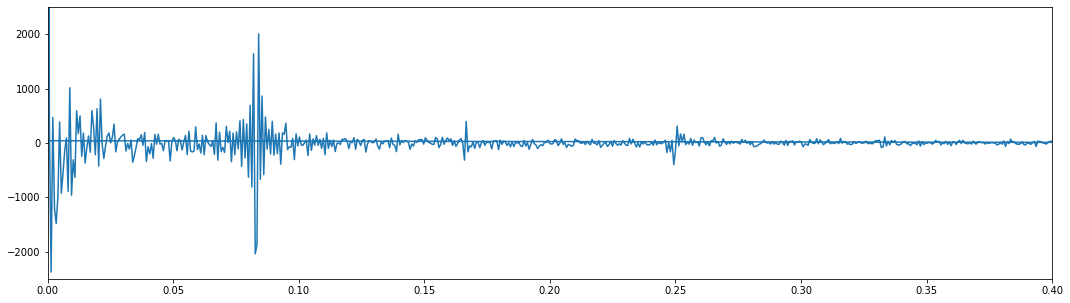

In [23]:
from scipy.fftpack import rfft, irfft, fftfreq
 
W = fftfreq(original_signal_temperature.size, d=1)      #d=1 hour
f_signal = rfft(original_signal_temperature)
plt.figure(1,figsize=(18,5))
plt.plot(W,f_signal)
plt.xlim([0, 0.4]);
plt.ylim([-2500, 2500]);
# If our original signal time was in seconds, this is now in Hz

# Fast Fourier Transform For Humidity signal

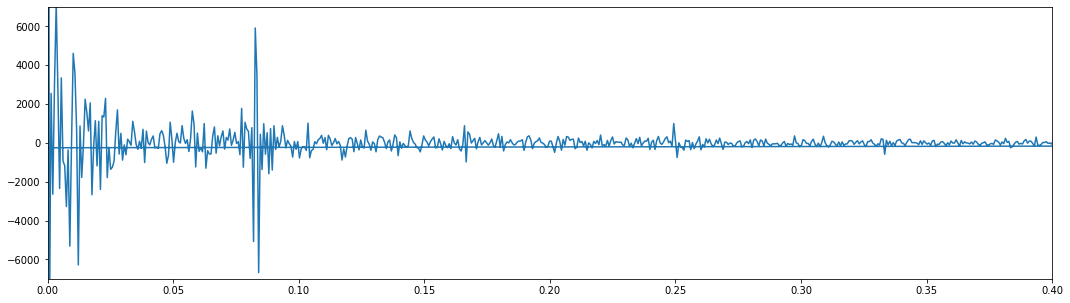

In [24]:
from scipy.fftpack import rfft, irfft, fftfreq
 
W = fftfreq(original_signal_Humidity.size, d=1)      #d=1 hour
f_signal = rfft(original_signal_Humidity)
plt.figure(1,figsize=(18,5))
plt.plot(W,f_signal)
plt.xlim([0.0, 0.4]);
plt.ylim([-7000, 7000]);
# If our original signal time was in seconds, this is now in Hz

## Simple Linear Regression

Model slope:     -0.007064609157044833
Model intercept: 26.105474456572598


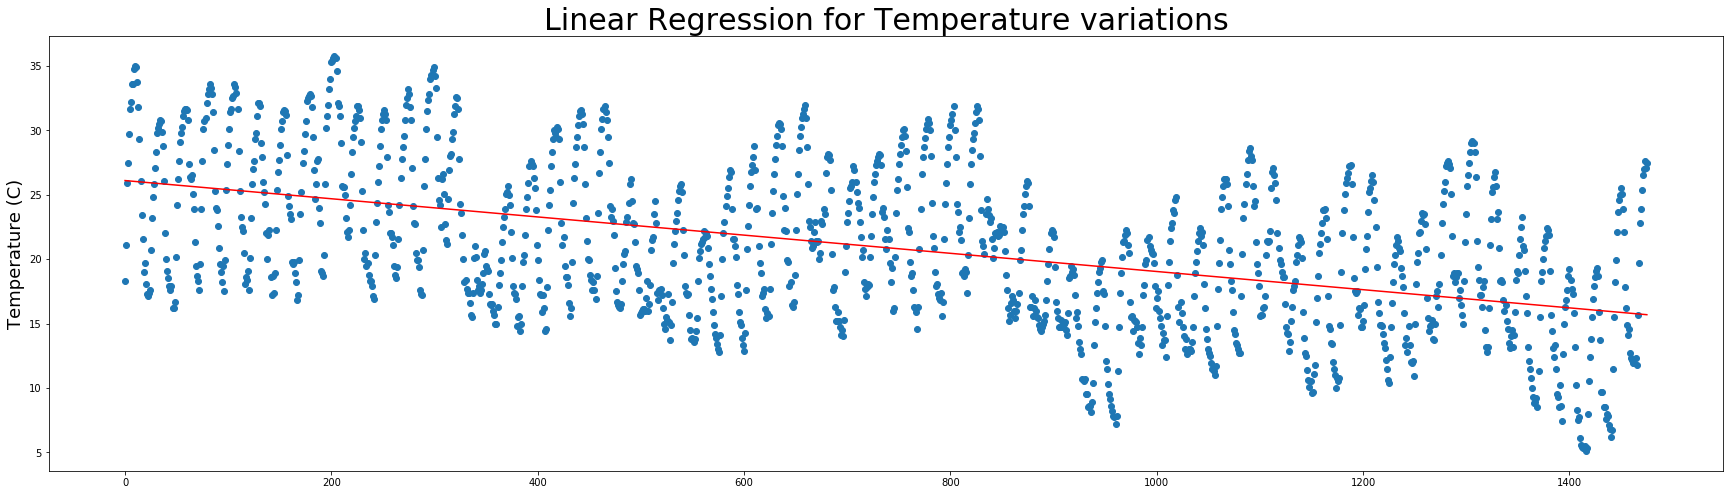

In [25]:
from sklearn.linear_model import LinearRegression
model = LinearRegression(fit_intercept=True)
x = np.arange(len(original_signal_temperature))
y=DF['Temperature']

model.fit(x[:, np.newaxis], y)
xfit = np.arange(len(original_signal_temperature))
yfit = model.predict(xfit[:, np.newaxis])




plt.figure(figsize=(30, 8))

plt.scatter(x, y)
plt.plot(xfit, yfit,color='red');
print("Model slope:    ", model.coef_[0])
print("Model intercept:", model.intercept_)
plt.ylabel("Temperature (C)", fontsize=18);
plt.title("Linear Regression for Temperature variations", fontsize=30);

Model slope:     0.009556558237282915
Model intercept: 33.37005998022065


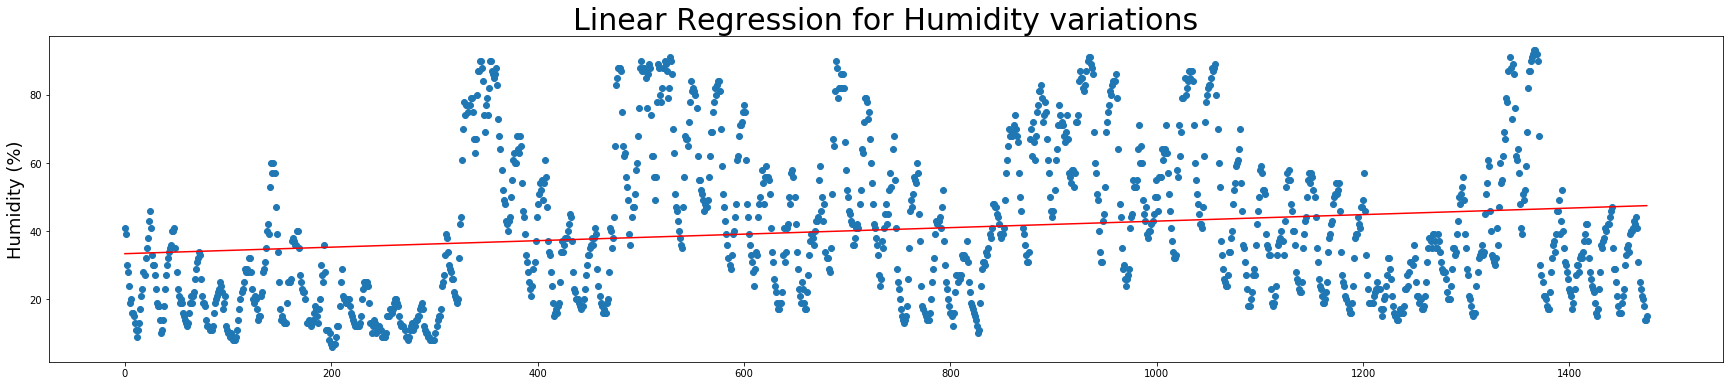

In [26]:
model = LinearRegression(fit_intercept=True)


xx = np.arange(len(original_signal_Humidity))
yy=DF['Humidity']

model.fit(xx[:, np.newaxis], yy)
xxfit = np.arange(len(original_signal_Humidity))
yyfit = model.predict(xxfit[:, np.newaxis])


plt.figure(figsize=(30, 6))

plt.scatter(xx, yy)
plt.plot(xxfit, yyfit,color='red');
print("Model slope:    ", model.coef_[0])
print("Model intercept:", model.intercept_)
plt.ylabel("Humidity (%)", fontsize=18);
plt.title("Linear Regression for Humidity variations", fontsize=30);

Model slope:     6.0911901743783654e-05
Model intercept: 0.07453546704390537


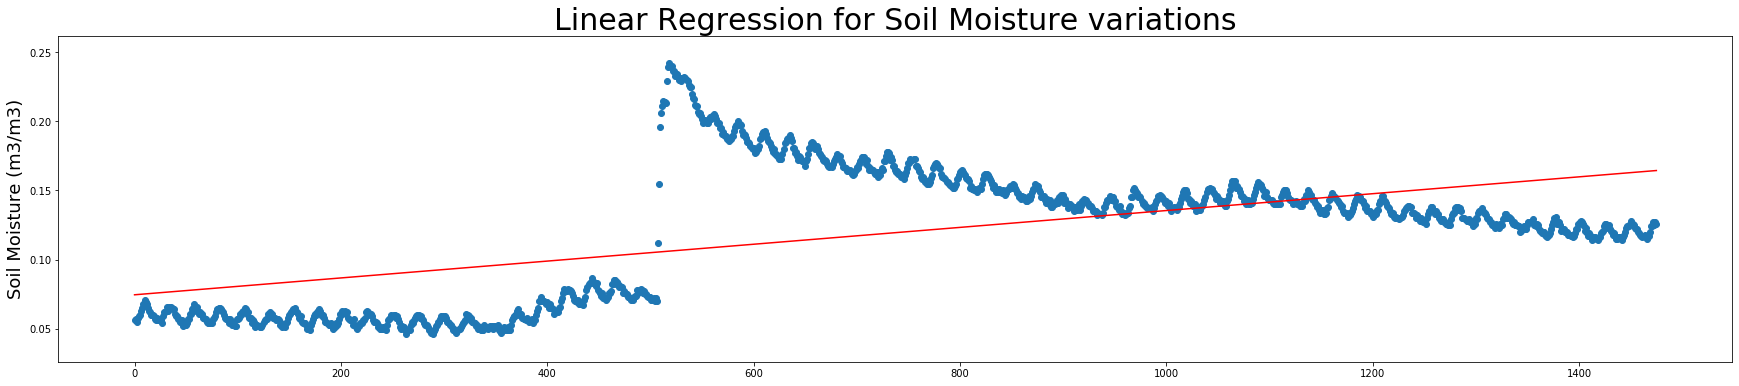

In [27]:
model = LinearRegression(fit_intercept=True)


xx = np.arange(len(original_signal_SoilMoisture))
yy=original_signal_SoilMoisture

model.fit(xx[:, np.newaxis], yy)
xxfit = np.arange(len(original_signal_SoilMoisture))
yyfit = model.predict(xxfit[:, np.newaxis])


plt.figure(figsize=(30, 6))

plt.scatter(xx, yy)
plt.plot(xxfit, yyfit,color='red');
print("Model slope:    ", model.coef_[0])
print("Model intercept:", model.intercept_)
plt.ylabel("Soil Moisture (m3/m3)", fontsize=18);
plt.title("Linear Regression for Soil Moisture variations", fontsize=30);

## Polynomial basis functions

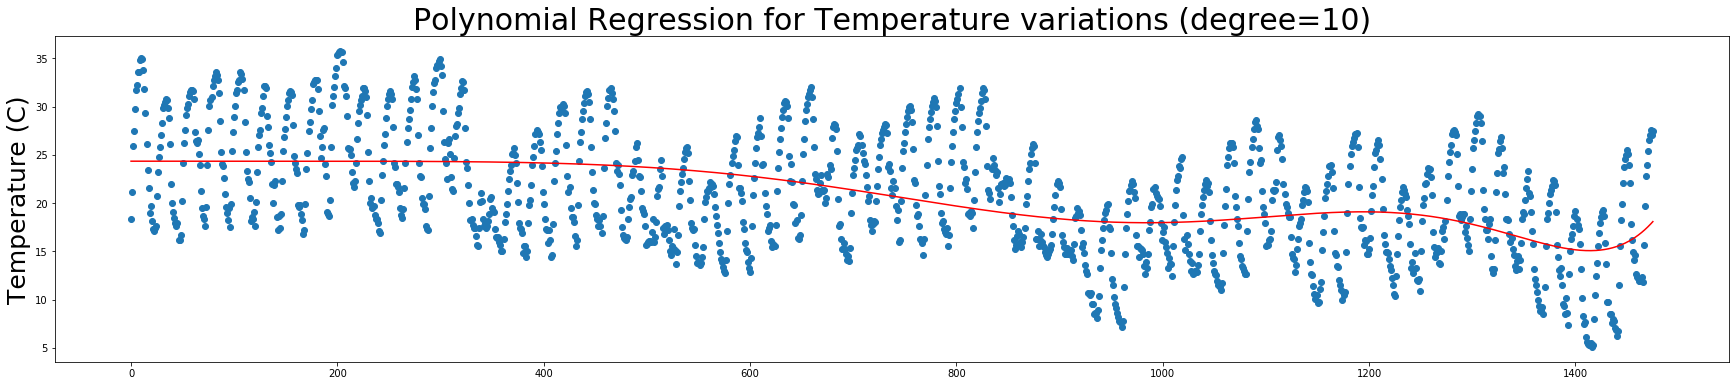

In [28]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

Poly_degree=10
poly_model = make_pipeline(PolynomialFeatures(Poly_degree),
                           LinearRegression())


x = np.arange(len(original_signal_temperature))
y=DF['Temperature']
plt.figure(figsize=(30, 6))


poly_model.fit(x[:, np.newaxis], y)
xfit = np.arange(len(original_signal_temperature))
yfit = poly_model.predict(xfit[:, np.newaxis])

plt.scatter(x, y)
plt.plot(xfit, yfit,color='red');
plt.ylabel("Temperature (C)", fontsize=25);
plt.title("Polynomial Regression for Temperature variations (degree="+str(Poly_degree)+")", fontsize=30);

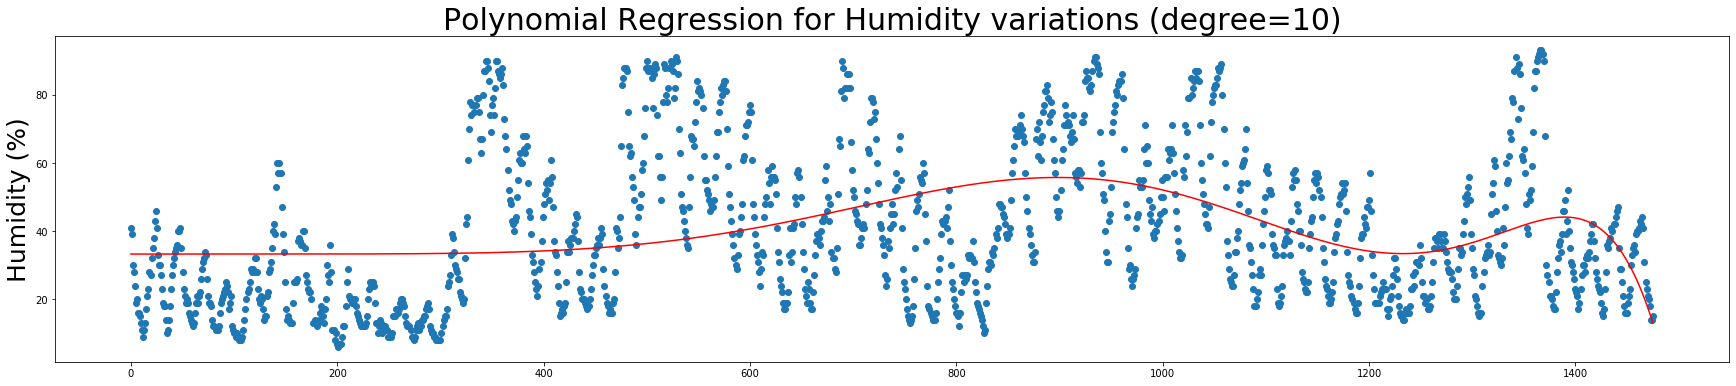

In [29]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

Poly_degree=10
poly_model = make_pipeline(PolynomialFeatures(Poly_degree),
                           LinearRegression())



xx = np.arange(len(original_signal_Humidity))
yy=DF['Humidity']
plt.figure(figsize=(30, 6))


poly_model.fit(xx[:, np.newaxis], yy)
xxfit = np.arange(len(original_signal_Humidity))
yyfit = poly_model.predict(xxfit[:, np.newaxis])

plt.scatter(xx, yy)
plt.plot(xxfit, yyfit,color='red');
plt.ylabel("Humidity (%)", fontsize=25);
plt.title("Polynomial Regression for Humidity variations (degree="+str(Poly_degree)+")", fontsize=30);

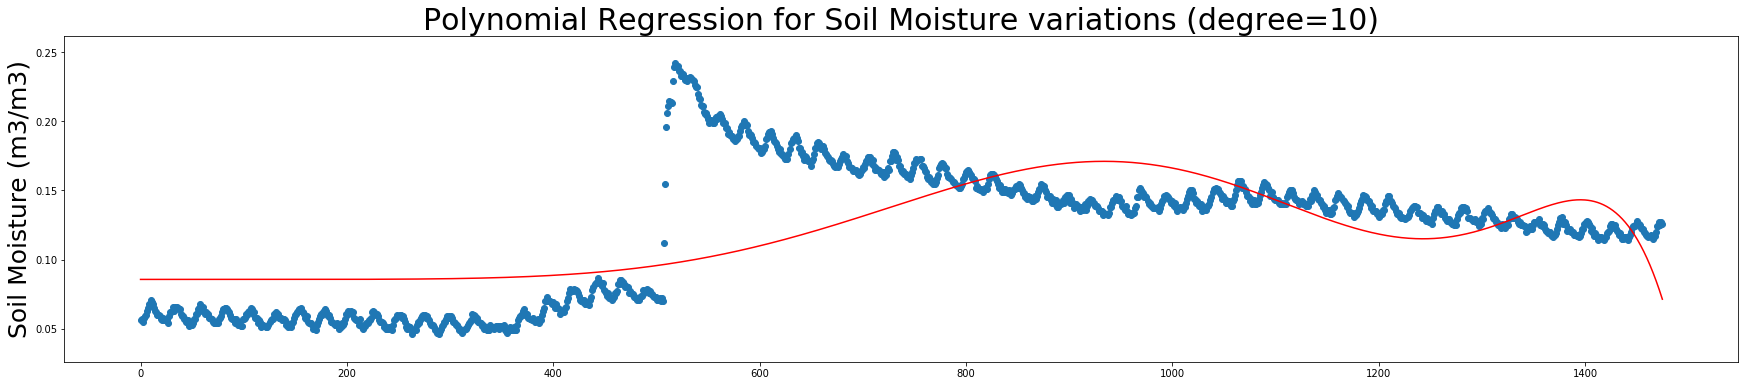

In [30]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

Poly_degree=10
poly_model = make_pipeline(PolynomialFeatures(Poly_degree),
                           LinearRegression())



xx = np.arange(len(original_signal_SoilMoisture))
yy=original_signal_SoilMoisture
plt.figure(figsize=(30, 6))


poly_model.fit(xx[:, np.newaxis], yy)
xxfit = np.arange(len(original_signal_SoilMoisture))
yyfit = poly_model.predict(xxfit[:, np.newaxis])

plt.scatter(xx, yy)
plt.plot(xxfit, yyfit,color='red');
plt.ylabel("Soil Moisture (m3/m3)", fontsize=25);
plt.title("Polynomial Regression for Soil Moisture variations (degree="+str(Poly_degree)+")", fontsize=30);

## Gaussian basis functions

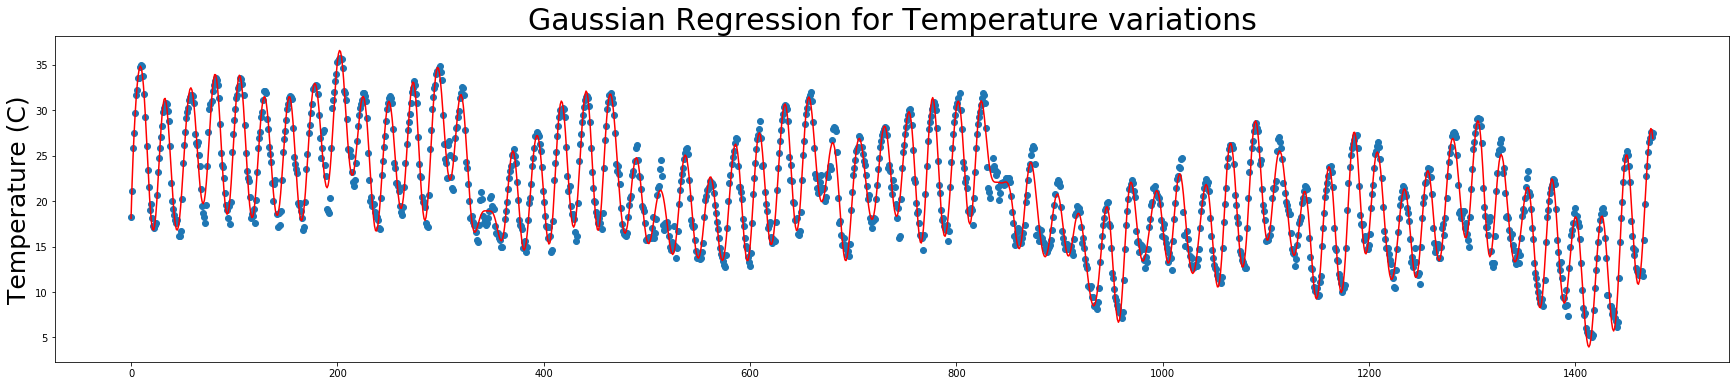

In [31]:
from sklearn.base import BaseEstimator, TransformerMixin

class GaussianFeatures(BaseEstimator, TransformerMixin):
    """Uniformly spaced Gaussian features for one-dimensional input"""
    
    def __init__(self, N, width_factor=2.0):
        self.N = N
        self.width_factor = width_factor
    
    @staticmethod
    def _gauss_basis(x, y, width, axis=None):
        arg = (x - y) / width
        return np.exp(-0.5 * np.sum(arg ** 2, axis))
        
    def fit(self, X, y=None):
        # create N centers spread along the data range
        self.centers_ = np.linspace(X.min(), X.max(), self.N)
        self.width_ = self.width_factor * (self.centers_[1] - self.centers_[0])
        return self
        
    def transform(self, X):
        return self._gauss_basis(X[:, :, np.newaxis], self.centers_,
                                 self.width_, axis=1)
    
gauss_model = make_pipeline(GaussianFeatures(200),
                            LinearRegression())


x = np.arange(len(original_signal_temperature))
y=DF['Temperature']
plt.figure(figsize=(30, 6))

gauss_model.fit(x[:, np.newaxis], y)
xfit = np.arange(len(original_signal_temperature))
yfit = gauss_model.predict(xfit[:, np.newaxis])

plt.scatter(x, y)
plt.plot(xfit, yfit,color='red')
plt.ylabel("Temperature (C)", fontsize=25);
plt.title("Gaussian Regression for Temperature variations", fontsize=30);

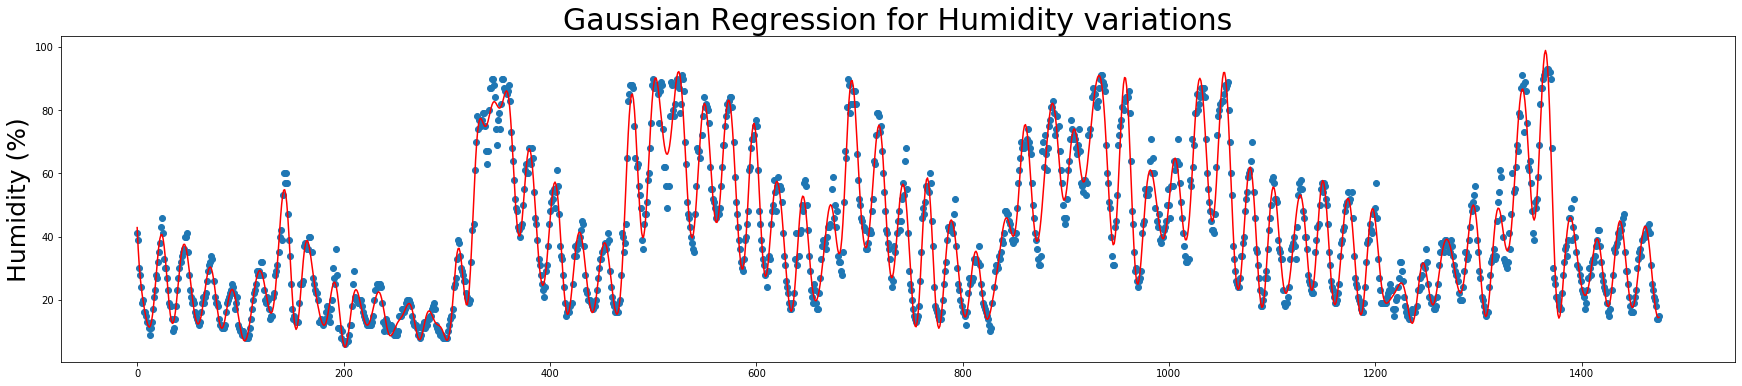

In [32]:
from sklearn.base import BaseEstimator, TransformerMixin

class GaussianFeatures(BaseEstimator, TransformerMixin):
    """Uniformly spaced Gaussian features for one-dimensional input"""
    
    def __init__(self, N, width_factor=2.0):
        self.N = N
        self.width_factor = width_factor
    
    @staticmethod
    def _gauss_basis(x, y, width, axis=None):
        arg = (x - y) / width
        return np.exp(-0.5 * np.sum(arg ** 2, axis))
        
    def fit(self, X, y=None):
        # create N centers spread along the data range
        self.centers_ = np.linspace(X.min(), X.max(), self.N)
        self.width_ = self.width_factor * (self.centers_[1] - self.centers_[0])
        return self
        
    def transform(self, X):
        return self._gauss_basis(X[:, :, np.newaxis], self.centers_,
                                 self.width_, axis=1)
    
gauss_model = make_pipeline(GaussianFeatures(200),
                            LinearRegression())


xx = np.arange(len(original_signal_Humidity))
yy=DF['Humidity']
plt.figure(figsize=(30, 6))

gauss_model.fit(xx[:, np.newaxis], yy)
xxfit = np.arange(len(original_signal_Humidity))
yyfit = gauss_model.predict(xxfit[:, np.newaxis])

plt.scatter(xx, yy)
plt.plot(xxfit, yyfit,color='red')
plt.ylabel("Humidity (%)", fontsize=25);
plt.title("Gaussian Regression for Humidity variations", fontsize=30);

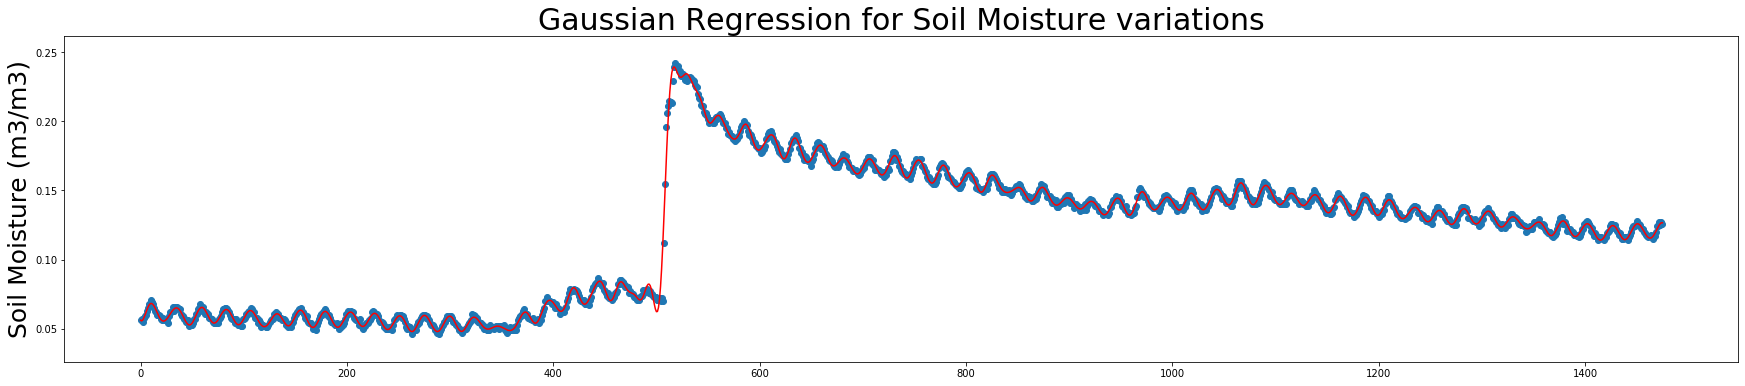

In [33]:
from sklearn.base import BaseEstimator, TransformerMixin

class GaussianFeatures(BaseEstimator, TransformerMixin):
    """Uniformly spaced Gaussian features for one-dimensional input"""
    
    def __init__(self, N, width_factor=2.0):
        self.N = N
        self.width_factor = width_factor
    
    @staticmethod
    def _gauss_basis(x, y, width, axis=None):
        arg = (x - y) / width
        return np.exp(-0.5 * np.sum(arg ** 2, axis))
        
    def fit(self, X, y=None):
        # create N centers spread along the data range
        self.centers_ = np.linspace(X.min(), X.max(), self.N)
        self.width_ = self.width_factor * (self.centers_[1] - self.centers_[0])
        return self
        
    def transform(self, X):
        return self._gauss_basis(X[:, :, np.newaxis], self.centers_,
                                 self.width_, axis=1)
    
gauss_model = make_pipeline(GaussianFeatures(200),
                            LinearRegression())


xx = np.arange(len(original_signal_SoilMoisture))
yy=original_signal_SoilMoisture
plt.figure(figsize=(30, 6))

gauss_model.fit(xx[:, np.newaxis], yy)
xxfit = np.arange(len(original_signal_SoilMoisture))
yyfit = gauss_model.predict(xxfit[:, np.newaxis])

plt.scatter(xx, yy)
plt.plot(xxfit, yyfit,color='red')
plt.ylabel("Soil Moisture (m3/m3)", fontsize=25);
plt.title("Gaussian Regression for Soil Moisture variations", fontsize=30);

## Developing a Numerical Model

If we consider the term $S_M$ as the soil moisture with the unit of $m^3/m^3$, The rate of change in soil moisture over time have an equation with percipitation and evaporation as below:

$$ D \frac{dS_M}{dt} = aP+bE $$

where $P$ represents percipitation and $E$ represents total evaporation. Also $D$ is the soil depth at which the soil moisture is measured.

In order to solve the above equation, we should have a formulation for evaporation. As the evaporation process depends on the air temperature, we use a simple linear approximation to model the term $E$.

$$ E = b \Delta T+c $$

Therefore:

$$ D \frac{dS_M}{dt} = aP + b \Delta T+c $$

In order to solve this equation, finite difference method is used as follow:

$$ D \frac {S_M^{n+1} - S_M^{n}}{\Delta t} = aP^{n} + b( {T^{n+1}-T^{n}})+c $$

$$ S_M^{n+1} = S_M^{n} + \frac {\Delta t}{D} [aP^{n} + b( {T^{n+1}-T^{n}})+c] $$

In this final algebraic expression we have 3 unknown coefficients of $a$, $b$ and $c$. In order to determine the values of these coefficients, we use our data in three successive time steps.
 

In [32]:
coef_a=0.00016
coef_b=0.00003571
coef_c=-0.0000065

dt=1   #one hour
DF['SoilMoisture2']=0
DF['SoilMoisture2'].iloc[0]=DF['SoilMoisture'].iloc[0]
D=0.05

for j in range(1,len(DF)):
    DF['SoilMoisture2'].iloc[j]=DF['SoilMoisture2'].iloc[j-1]+(dt/D)*(coef_a*DF['Precipitation'].iloc[j-1]+coef_b*(DF['Temperature'].iloc[j]-DF['Temperature'].iloc[j-1])+coef_c)


C:\Users\behza\Anaconda3\lib\site-packages\pandas\core\indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


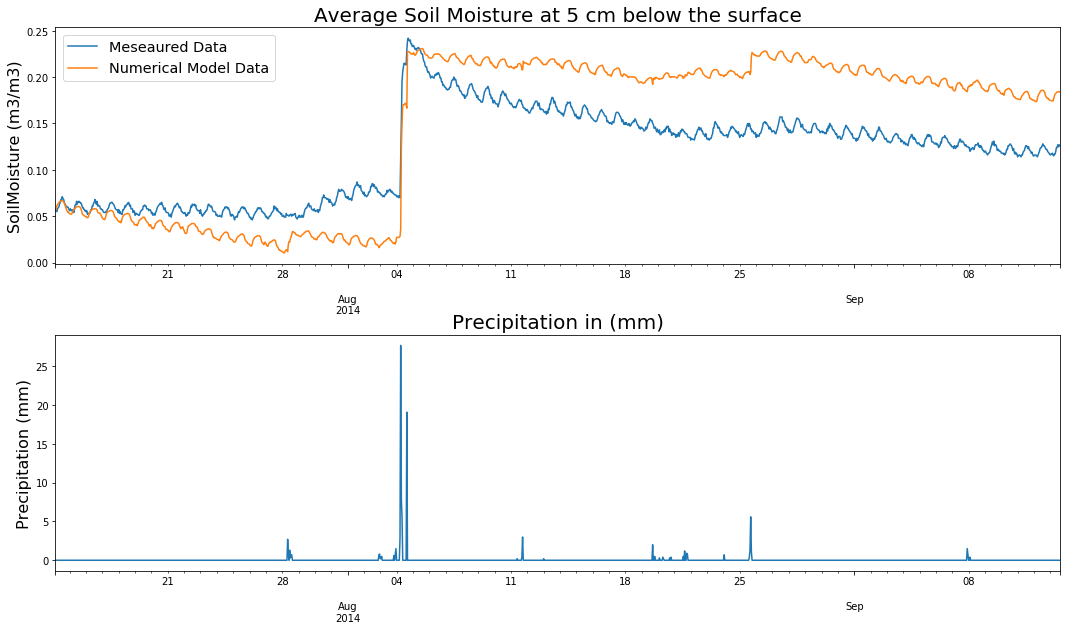

In [33]:
fig, axarr = plt.subplots(2, 1)

DF['SoilMoisture'].plot.line(figsize=(18, 10),ax=axarr[0])
DF['SoilMoisture2'].plot.line(figsize=(18, 10),ax=axarr[0])
DF['Precipitation'].plot.line(figsize=(18, 10),ax=axarr[1])

axarr[0].set_title('Average Soil Moisture at 5 cm below the surface', fontsize=20);
axarr[0].set_ylabel('SoilMoisture (m3/m3)', fontsize=16);
axarr[0].legend(['Meseaured Data', 'Numerical Model Data'], fontsize = 'x-large');

axarr[1].set_title('Precipitation in (mm)', fontsize=20);
axarr[1].set_ylabel('Precipitation (mm)', fontsize=16);

plt.subplots_adjust(hspace=.3)